<a href="https://colab.research.google.com/github/Chandni0369/ML-LAB-D11ADA-57/blob/main/exp%2013/ML_exp13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
uploaded = files.upload()
data = pd.read_csv(next(iter(uploaded)))
print("Dataset shape:", data.shape)
data.head()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv
Dataset shape: (418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [3]:
# assuming the last column is target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature shape:", X_scaled.shape)

Feature shape: (418, 1)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

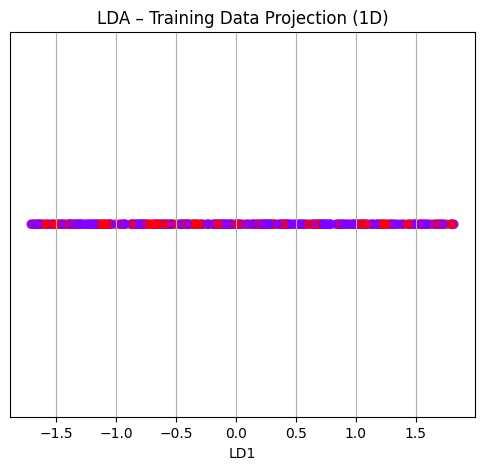

In [17]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

plt.figure(figsize=(6,5))
plt.scatter(X_train_lda[:,0], [0]*len(X_train_lda), c=y_train, cmap='rainbow', alpha=0.7)
plt.title("LDA – Training Data Projection (1D)")
plt.xlabel("LD1")
plt.yticks([])
plt.grid(True)
plt.show()

In [18]:
y_pred = lda.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc*100:.2f}%")

Model Accuracy: 63.49%
